In [60]:
import os

In [61]:
data_dir = "\\cell_images"

In [62]:
os.listdir(data_dir)

['test', 'train']

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
import seaborn as sns

In [65]:
from matplotlib.image import imread

In [66]:
test_path = data_dir + '\\test'
train_path = data_dir + '\\train'

In [1]:
#test_path

In [2]:
#train_path

In [69]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [70]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [71]:
#we're gonna build a model, which is gonna detect, on the basis of cell image, if it's infected or not

In [3]:
#os.listdir(train_path +'\\parasitized') #gives the list of all the infected cells in the training data

In [73]:
os.listdir(train_path +'\\parasitized')[0] #grabbing the first image

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [74]:
#showing that image
para_cell = train_path + '\\parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'
#imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [75]:
imread(para_cell).shape

(148, 142, 3)

In [76]:
#it's a coloured image since it has 3 color channels

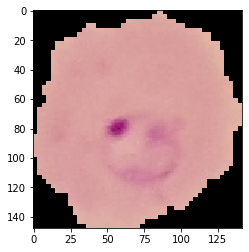

In [77]:
plt.imshow(imread(para_cell))

In [78]:
#This is what an infected cell looks like. Notice, there is pink spot in the middle

In [79]:
os.listdir(train_path +'\\uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [80]:
uninfected_cell = train_path + '\\uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [81]:
uninfected_cell = imread(uninfected_cell)

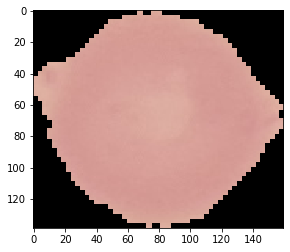

In [82]:
plt.imshow(uninfected_cell)

In [83]:
#image of an uninfected cell, notice, there are no spots present here

In [84]:
len(os.listdir(train_path +'\\parasitized'))

12479

In [85]:
len(os.listdir(train_path +'\\uninfected'))

12479

In [86]:
len(os.listdir(test_path +'\\parasitized'))

1300

In [87]:
len(os.listdir(test_path +'\\uninfected'))

1300

In [88]:
#average shape of the images

In [89]:
dim1 = []
dim2 = []

for image_filename in os.listdir(train_path + '\\uninfected'):
    img = imread(train_path + '\\uninfected\\' + image_filename)
    d1,d2,color = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [90]:
#histogram of dim1 and dim2

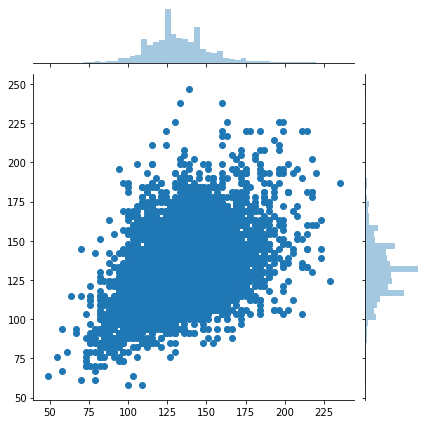

In [91]:
sns.jointplot(dim1, dim2)

In [92]:
#the dimensions varry a lot.
#CNN can't use variable dimensions , so we're gonna resize them to one dimension
#by calculating the average

In [93]:
np.mean(dim1)

131.64820899110507

In [94]:
np.mean(dim2)

131.4041990544114

In [95]:
#hence, both the average dimensions are near 130, we'll resize it as
image_shape = (130, 130, 3)

In [96]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [97]:
#help(ImageDataGenerator)

In [98]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                              zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')

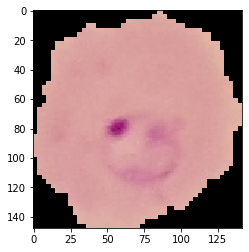

In [99]:
para_img = imread(para_cell)
plt.imshow(para_img)

In [100]:
#doing random transformation to an infected cell using image generator

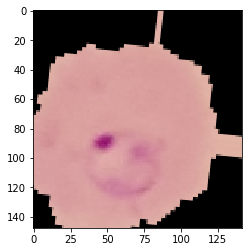

In [101]:
plt.imshow(image_gen.random_transform(para_img))

In [102]:
#This is a great method to randomly generate new data and increase the values in our rather small dataset

In [103]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [104]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [105]:
from tensorflow.keras.models import Sequential

In [106]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [107]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [108]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [109]:
from tensorflow.keras.callbacks import EarlyStopping

In [110]:
early_stop = EarlyStopping(monitor ='val_loss', patience= 2)

In [111]:
#we're gonna train our model in batches
batch_size = 16
#we're gonna take 16 images at a time for training

In [112]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb',
                                               batch_size=batch_size, class_mode='binary')

Found 24958 images belonging to 2 classes.


In [113]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb',
                                               batch_size=batch_size, class_mode='binary', shuffle=False)

Found 2600 images belonging to 2 classes.


In [114]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [115]:
results = model.fit_generator(train_image_gen, epochs = 20, validation_data = test_image_gen,
                             callbacks = [early_stop])

Epoch 1/20
1560/1560 [==============================] - 537s 345ms/step - loss: 7.6704 - accuracy: 0.4997 - val_loss: 7.6431 - val_accuracy: 0.5000
Epoch 2/20
1560/1560 [==============================] - 574s 368ms/step - loss: 7.6650 - accuracy: 0.5001 - val_loss: 7.6431 - val_accuracy: 0.5000
Epoch 3/20
1560/1560 [==============================] - 568s 364ms/step - loss: 7.6663 - accuracy: 0.5000 - val_loss: 7.6431 - val_accuracy: 0.5000


In [116]:
from tensorflow.keras.models import load_model

In [117]:
model = load_model('malaria_detector.h5')

In [118]:
model.evaluate_generator(test_image_gen)

[1.9013331518308538, 0.875]

In [120]:
model.metrics_names

['loss', 'accuracy']

In [121]:
pred = model.predict_generator(test_image_gen)

In [125]:
#pred are probability values, although they look like 0 and 1s (binary)

In [123]:
predictions = pred > 0.5

In [132]:
#what we are saying here with predictions is that if the pred > 0.5, say that it's uninfected

In [124]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [126]:
#True and Flase statements are treated as 1s and 0s in the case of numpy

In [128]:
from sklearn.metrics import classification_report, confusion_matrix

In [130]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1300
           1       0.97      0.76      0.85      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [131]:
print(confusion_matrix(test_image_gen.classes, predictions))

[[1271   29]
 [ 313  987]]


In [133]:
#predicting on a single image

In [134]:
para_cell

'C:\\Users\\khanna\\Python_stuff\\Study stuff\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [135]:
from tensorflow.keras.preprocessing import image

In [137]:
my_image  = image.load_img(para_cell, target_size= image_shape)

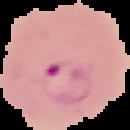

In [138]:
my_image

In [139]:
my_img_arr = image.img_to_array(my_image)

In [140]:
my_img_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [141]:
my_img_arr.shape

(130, 130, 3)

In [143]:
#resize it along the 0 dimenstion(1,130,130,3) #in batches

In [144]:
my_img_arr = np.expand_dims(my_img_arr, axis = 0)

In [145]:
my_img_arr.shape

(1, 130, 130, 3)

In [147]:
model.predict(my_img_arr)

array([[0.]], dtype=float32)

In [148]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [149]:
#so the model predicts that the above image is 'parasitized', i.e., infected